In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt


*Опишем функции*

In [24]:
def analyze_fft(f, title="", D=0):
    # test(f, "original " + title)
    x = discretization(10, 10/100)
    plot_1 = ((x, f(x), "original" + title))
    g = fft(f(x))
    g = g[:int(len(g) * (1 - D))]
    e = fft(g, inverse=True)[:100]
    x = np.ndarray.tolist(x)
    e = np.ndarray.tolist(e)
    plot_2 = ((x, e, "fourier-transformed " + title))
    plot(plot_1, plot_2, "fourier-transformed " + title)


def fft(a, inverse=False, first_iteration=True):
    if len(a) == 1:
        return a
    c = int(math.pow(2, (math.ceil(math.log2(len(a)))))) - len(a)
    a = np.append(a, [0] * c)
    # if not inverse:
    a = np.asarray(a, dtype=complex)
    n = a.shape[0]
    n_arr = np.arange(1, n // 2 + 1, 1)
    if n % 2 > 0 and n != 1:
        raise ValueError("size of x must be a power of 2")
    A_even = fft(a[::2], inverse, first_iteration=False)
    A_odd = fft(a[1::2], inverse, first_iteration=False)
    angle = 2 * np.pi * (-1 if inverse else 1) / n
    root = complex(math.cos(angle), math.sin(angle))
    factor = np.array([root ** i for i in range(n//2)])
    return np.concatenate([(A_even + A_odd * factor) / (n if (inverse and first_iteration) else 1),
                           (A_even - A_odd * factor) / (n if (inverse and first_iteration) else 1)])


def discretization(To, Step):
    A = np.arange(0, To, Step)
    return A


def plot(x, y, title="", coefficients_deleted=0):
    # plt.title(x[2])
    series = (plt.plot(x[0], x[1]), plt.plot(y[0], y[1]))
    plt.grid(True)
    plt.figlegend(series)
    

*Посмотрим, что получается с частотой дискретизации 100 на [0, 10]*

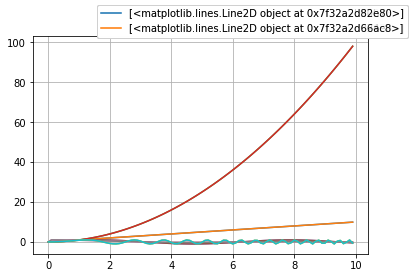

In [25]:
analyze_fft(lambda x : x, "x")
analyze_fft(lambda x : x*x, "x^2" )
analyze_fft(lambda x : np.sin(x), "sin x")
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x")
analyze_fft(lambda x : np.sin(x*x), "sin x^2")

*Классно, графики получились очень похожими. Теперь будем искать для каждой функции долю коэффициентов, при обнулении которых разница будет заметной*

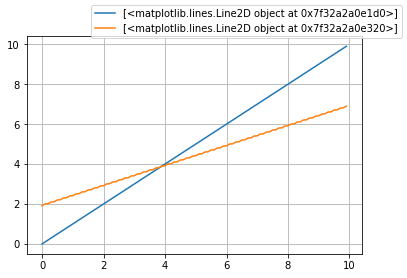

In [26]:
analyze_fft(lambda x : x, "x", D=0.49)

*Наклон почти не изменился*

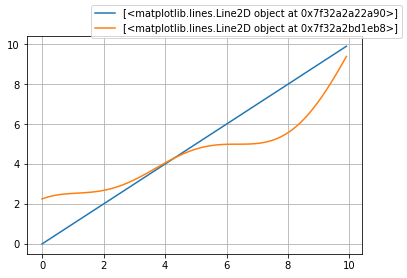

In [27]:
analyze_fft(lambda x : x, "x", D=0.01)

*Видим, что данная функция не отличается на незануленном диапазоне дальше при большом D. Идем дальше*

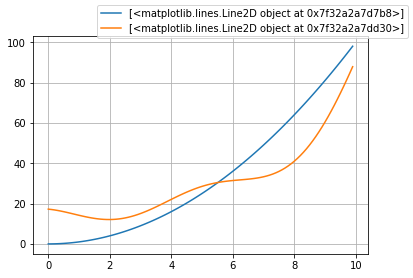

In [28]:
analyze_fft(lambda x : x*x, "x^2", 0.01 )

*Здесь различия более заметны. Будем рассматривать меньшие значения D*

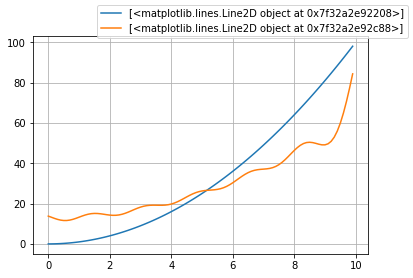

In [29]:
analyze_fft(lambda x : x*x, "x^2", 0.05 )

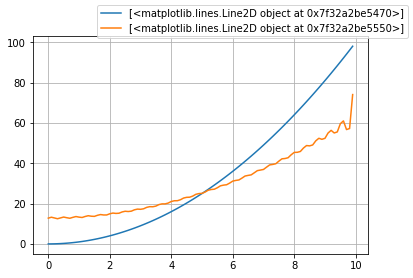

In [30]:
analyze_fft(lambda x : x*x, "x^2", 0.25 )

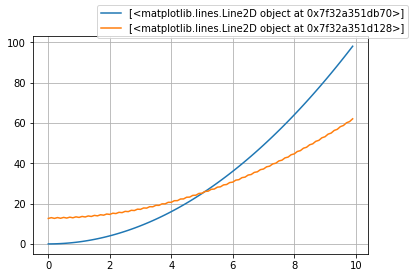

In [31]:
analyze_fft(lambda x : x*x, "x^2", 0.49 )

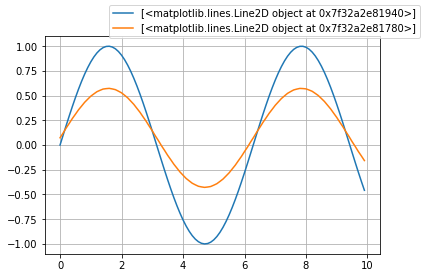

In [32]:
analyze_fft(lambda x : np.sin(x), "sin x", 0.49)

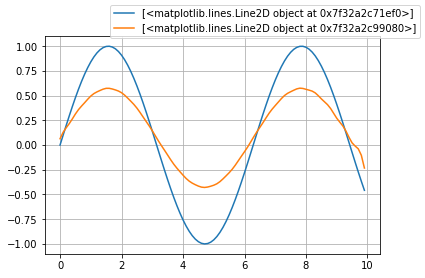

In [33]:
analyze_fft(lambda x : np.sin(x), "sin x", 0.2)

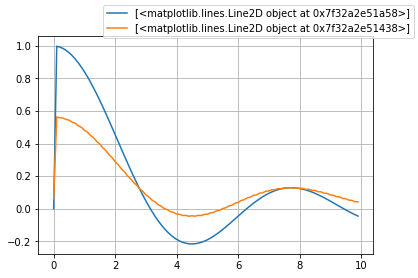

In [34]:
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x", 0.49)

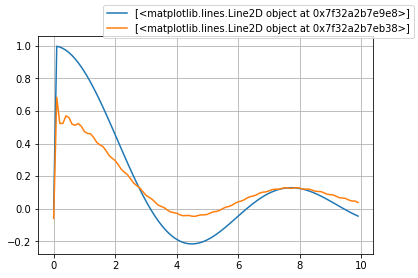

In [35]:
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x", 0.25)

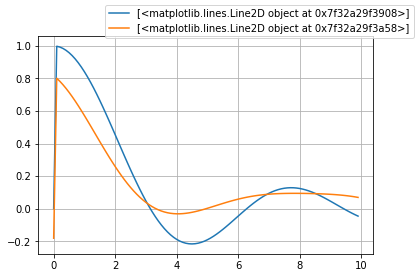

In [36]:
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x", 0.01)

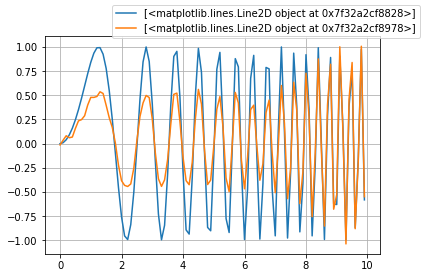

In [37]:
analyze_fft(lambda x : np.sin(x*x), "sin x^2", 0.25)

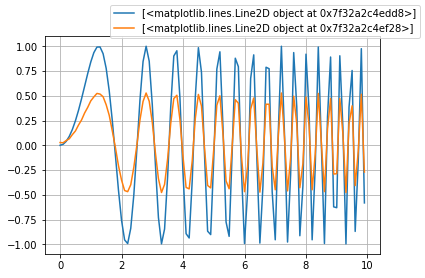

In [38]:
analyze_fft(lambda x : np.sin(x*x), "sin x^2", 0.49)

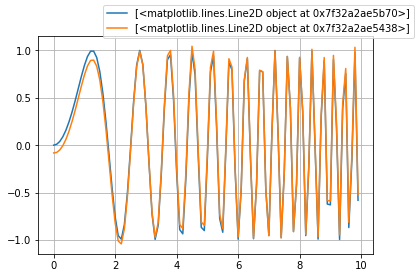

In [39]:
analyze_fft(lambda x : np.sin(x*x), "sin x^2", 0.01)

*Можем сделать вывод, что при D = 0 и D = 0.49 графики выглядят неотличимо для человеческого глаза, если принебречь масштабом. В основном графики при D = 0.01 уже различимы.*